# **Benford Law**

---



Also known as the first digit rule. **Benford's law** states that the leading digit in many real-life sets of numerical data is likely to be small.  **The number 1** appears as the leading significant digit **roughly 30%** of the time in sets that respect the law, while 9 appears as the leading significant digit less than 5% of the time. The digits would appear roughly 11.1 percent of the time if they were dispersed evenly. Benford's law also predicts the distribution of second, third, and digit combinations, among other things.

Using a test dataset from google colab of the carlifornia housing dataset, i focused on the population column with 17000 values.

---



In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Loading datsset
cali_house = pd.read_csv(r"C:\Users\Conrad_Pandora\Downloads\california_housing_train.csv")
#Feature engineering
cali_house
num_set = cali_house['population'].astype(int)
first_digit_set=[]

In [ ]:
len(cali_house)

17000

In [ ]:
cali_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
#creating a function to extract first digit in sample 
def get_loading_digit(number):
  #convert the number to a string
  #take the first character
  #convert back to an integer and return the value
  return int(str(number)[:1])

#loading digits into dictionary
for d in num_set:
  first_digit_set.append(get_loading_digit(d))
#Counting the leading digits in dict
for i in list (range(1,10)):
  print('There are ' + str(first_digit_set.count(i))+ ' leading ' + str(i) + ' s')

There are 7515 leading 1 s
There are 2201 leading 2 s
There are 1072 leading 3 s
There are 769 leading 4 s
There are 848 leading 5 s
There are 1024 leading 6 s
There are 1169 leading 7 s
There are 1235 leading 8 s
There are 1167 leading 9 s


**Plotting the distribution**

In [ ]:
#Creating the First digits & expected frequency distribution
data = {'lead_digit': [1, 2, 3, 4, 5, 6, 7, 8, 9] }
ben = pd.DataFrame(data,columns=['lead_digit'])
ben['Benford_Dist'] = np.log10(1+(1/ben['lead_digit']))*100
ben

#value counts in observed dataset & frequency distribution
counts = df.value_counts().sort_index()
ben_obs = pd.DataFrame(counts,columns=['observed_count'])
ben_obs['Observed_Dist']= (ben_obs['digits_obs']/17000)*100
obs = ben_obs.reset_index()

In [ ]:
from IPython.display import display_html

def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h3>{title}</h3> {df_html}</div>'
        html +=cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)

dfs = {'Observed':ben_obs, 'Benford':ben.set_index('lead_digit')}
display_dfs(dfs, justify='flex-start')

,digits_obs,Observed_Dist
first_digit,,
1,7515,44.205882
2,2201,12.947059
3,1072,6.305882
4,769,4.523529
5,848,4.988235
6,1024,6.023529
7,1169,6.876471
8,1235,7.264706
9,1167,6.864706


In [ ]:
all_ = pd.concat([obs,ben],axis = 1)
all_.drop(['lead_digit'],axis = 1)

,first_digit,digits_obs,Observed_Dist,Benford_Dist
0,1,7515,44.205882,30.103000
1,2,2201,12.947059,17.609126
2,3,1072,6.305882,12.493874
3,4,769,4.523529,9.691001
4,5,848,4.988235,7.918125
5,6,1024,6.023529,6.694679
6,7,1169,6.876471,5.799195
7,8,1235,7.264706,5.115252
8,9,1167,6.864706,4.575749


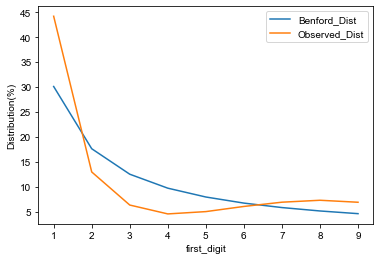

In [ ]:
sns.lineplot(y= 'Benford_Dist' ,x='first_digit', data = all_)
sns.lineplot(y= 'Observed_Dist',x='first_digit' , data = all_)
plt.legend(labels=['Benford_Dist','Observed_Dist'])
plt.ylabel('Distribution(%)')
sns.set_style('darkgrid')

The housing dataset shows conformance with the benford distribution pattern

# **Possible Applications**

https://mathworld.wolfram.com/BenfordsLaw.html

The following data set was scrapped from Automobile sales 